In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

data = pd.read_csv("iris_with_species.csv")

In [10]:
data_a = data.iloc[:, :-1]
data_a.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
def scater_plot(data, value):
    x_values = f"{value}_length"
    y_values = f"{value}_width"
    x_label = f"Length of {value}"
    y_label = f"Width of {value}"
    if "cluster_pred" in data.columns:
        plt.scatter(data[x_values], data[y_values], c=data["cluster_pred"], cmap="rainbow")
    else:
        plt.scatter(data[x_values], data[y_values])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    return plt.show()

In [25]:
def scale_data(data):
    scaler = preprocessing.StandardScaler()
    scaler.fit(data)
    data_scaled = scaler.transform(data)
    return data_scaled

In [26]:
scale_data(data_a)

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

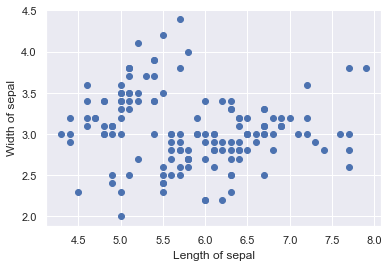

In [5]:
scater_plot(data=data_a, value="sepal")

In [6]:
number_of_clusters = 2
data_c = data_a.copy()
kmeans = KMeans(number_of_clusters)
kmeans.fit(data_c)

data_c["cluster_pred"] = kmeans.fit_predict(data_c)
data_c

,sepal_length,sepal_width,petal_length,petal_width,cluster_pred
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


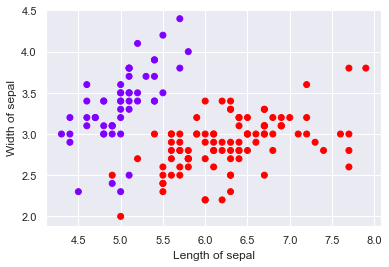

In [8]:
scater_plot(data_c, "sepal")